In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

%matplotlib inline 

In [2]:
import importlib
import ids_common
importlib.reload(ids_common)

SEED = random.randint(0, 42424242)
SEED = 42
print(f'SEED = {SEED}')

SEED = 42


In [3]:
df_orig = pd.read_csv('./sampled_data/sample_1/clean_ferrag_dnn_dataset.csv', low_memory=False)

In [4]:
df_train, df_test = ids_common.ds_split(df_orig, seed=42)

dataset = {}
dataset['2_class'] = {
    'train': ids_common.make_2_class(df_train),
    'test': ids_common.make_2_class(df_test)
}

dataset['14_class'] = {
    'train':ids_common.make_14_class(df_train),
    'test':ids_common.make_14_class(df_test)
}

dataset['15_class'] = {
    'train':ids_common.make_15_class(df_train),
    'test':ids_common.make_15_class(df_test)
}


def get_data(class_type, set_type):
    X, y = dataset[class_type][set_type]
    return X, y

In [5]:
def make_classifier(name, cls):
    X_train, y_train = get_data(name, 'train')
    X_test, y_test = get_data(name, 'test')

    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    cls.fit(X_train, y_train)

    y_train_predict = cls.predict(X_train)
    y_test_predict = cls.predict(X_test)

    print(f'{cls.__class__.__name__}:')
    print(f'Train score: {cls.score(X_train, y_train)}')
    print(f'Test score:  {cls.score(X_test, y_test)}')

    ids_common.report(y_train, y_train_predict, y_test, y_test_predict, le)
    ids_common.plot_cm(y_test, y_test_predict, le)

    return cls

DecisionTreeClassifier:
Train score: 0.9820633367064249
Test score:  0.9814416188683953
TRAIN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1089647
           1       1.00      0.94      0.97    417378

    accuracy                           0.98   1507025
   macro avg       0.99      0.97      0.98   1507025
weighted avg       0.98      0.98      0.98   1507025

TEST:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    272412
           1       1.00      0.93      0.97    104345

    accuracy                           0.98    376757
   macro avg       0.99      0.97      0.98    376757
weighted avg       0.98      0.98      0.98    376757



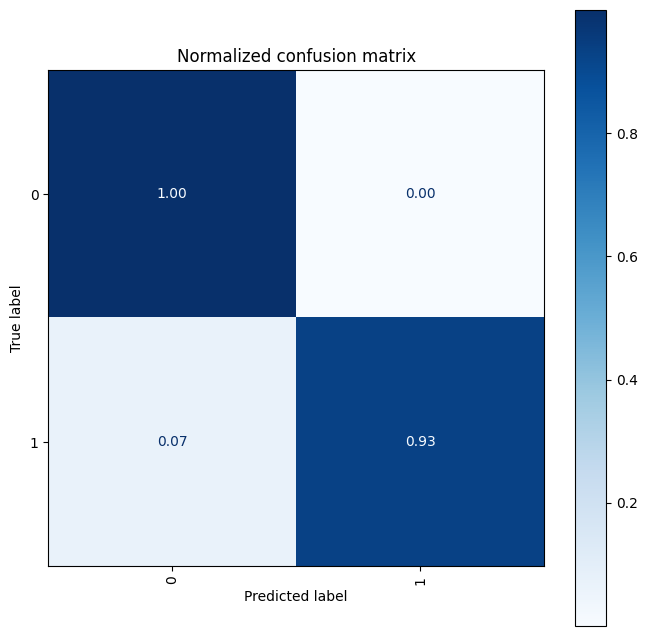

In [6]:
class_2_dt = make_classifier( 
        '2_class',
        DecisionTreeClassifier(
                **{'criterion': 'entropy', 'max_depth': 16}, random_state=SEED),
)

XGBClassifier:
Train score: 0.9495445375654682
Test score:  0.9412621591834779
TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.96      0.98     18724
            DDoS_HTTP       0.87      0.92      0.89     31532
            DDoS_ICMP       1.00      1.00      1.00     54348
             DDoS_TCP       1.00      1.00      1.00     40049
             DDoS_UDP       1.00      1.00      1.00     97254
       Fingerprinting       1.00      0.77      0.87       611
                 MITM       1.00      1.00      1.00       280
             Password       0.82      0.93      0.87     37094
        Port_Scanning       0.85      1.00      0.92     15979
           Ransomware       1.00      0.93      0.96      7373
        SQL_injection       0.86      0.87      0.86     38094
            Uploading       0.97      0.74      0.84     24943
Vulnerability_scanner       1.00      0.97      0.98     39736
                  XSS       1.0

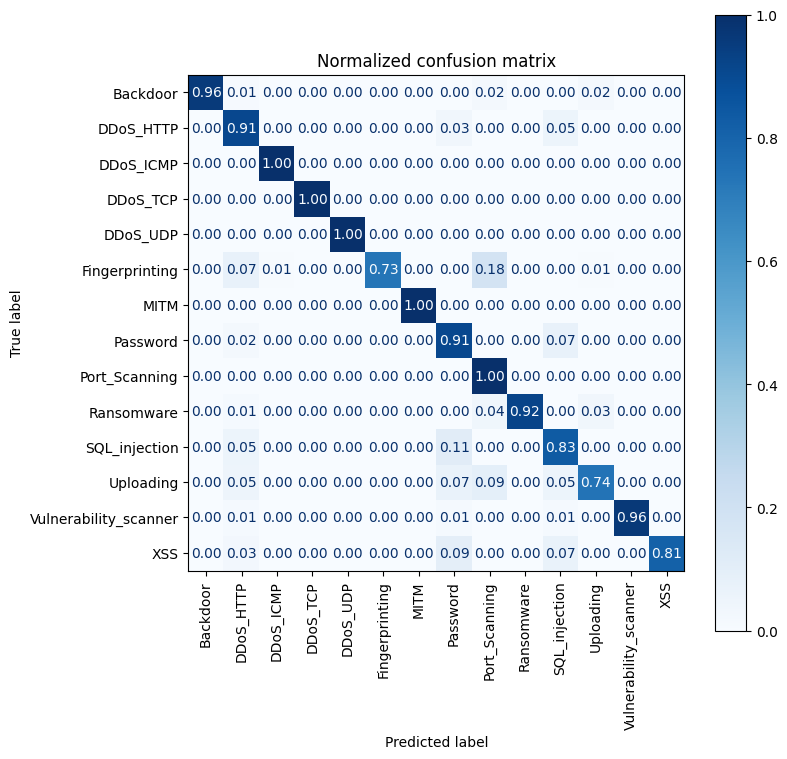

In [7]:
class_14_xgb = make_classifier( 
        '14_class',
        xgb.XGBClassifier(objective="multi:softprob", random_state=SEED)
)

XGBClassifier:
Train score: 0.9782292928119971
Test score:  0.9770037451195333
TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.96      0.98     18724
            DDoS_HTTP       0.95      0.85      0.90     31532
            DDoS_ICMP       1.00      1.00      1.00     54348
             DDoS_TCP       1.00      1.00      1.00     40049
             DDoS_UDP       1.00      1.00      1.00     97254
       Fingerprinting       1.00      0.77      0.87       611
                 MITM       1.00      1.00      1.00       280
               Normal       0.98      1.00      0.99   1089647
             Password       1.00      0.79      0.88     37094
        Port_Scanning       0.85      1.00      0.92     15979
           Ransomware       1.00      0.93      0.96      7373
        SQL_injection       0.97      0.77      0.86     38094
            Uploading       0.97      0.74      0.84     24943
Vulnerability_scanner       1.0

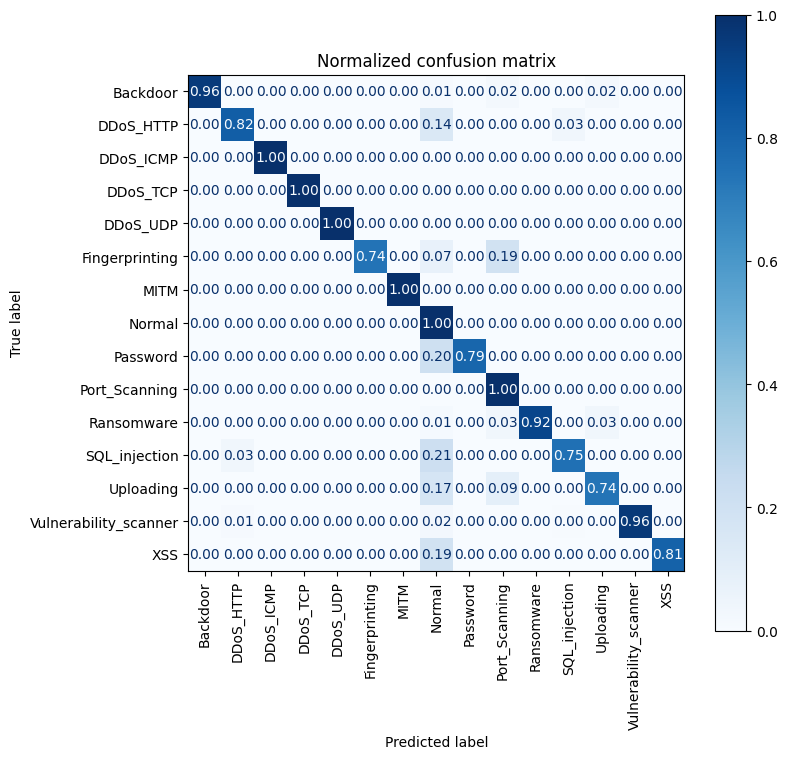

In [8]:
class_15_xgb = make_classifier( 
        '15_class',
        xgb.XGBClassifier(objective="multi:softprob", random_state=SEED)
)